In [1]:
import os
import time
import requests
import sys

In [2]:
def retrieve_html():
    for year in range(2013,2019):
        for month in range(1,13):
            if month<10:
                
                url="https://en.tutiempo.net/climate/0{}-{}/ws-432950.html".format(month, year)
            else:
                url="https://en.tutiempo.net/climate/{}-{}/ws-432950.html".format(month, year)
        texts= requests.get(url)
        text_utf=texts.text.encode('utf=8')
        if not os.path.exists('Data/html_data/{}'.format(year)):
            os.makedirs('Data/html_data/{}'.format(year))
        with open('Data/html_data/{}/{}.html'.format(year,month),'wb') as output:
            output.write(text_utf)
        sys.stdout.flush()

In [3]:
if __name__=='__main__':
    start=time.time()
    retrieve_html()
    stop= time.time()
    print('time taken: {}'.format(stop-start))

time taken: 7.968159914016724


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def avg2013():
    
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/PMValue/aqi2013.csv',chunksize=24):
        addvar=0
        avg=0
        data=[]
        df=pd.DataFrame(data=rows)
        for i,r in df.iterrows():
            data.append(r['PM2.5'])
        for i in data:
            if type(i)==float or type(i)==int:
                addvar+=i
            elif type(i)==str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    addvar+=temp
        avg=addvar/24
        temp_i+=1
        average.append(avg)
    return average

In [6]:
def avg2014():
    
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/PMValue/aqi2014.csv',chunksize=24):
        addvar=0
        avg=0
        data=[]
        df=pd.DataFrame(data=rows)
        for i,r in df.iterrows():
            data.append(r['PM2.5'])
        for i in data:
            if type(i)==float or type(i)==int:
                addvar+=i
            elif type(i)==str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    addvar+=temp
        avg=addvar/24
        temp_i+=1
        average.append(avg)
    return average

In [7]:
def avg2015():
    
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/PMValue/aqi2015.csv',chunksize=24):
        addvar=0
        avg=0
        data=[]
        df=pd.DataFrame(data=rows)
        for i,r in df.iterrows():
            data.append(r['PM2.5'])
        for i in data:
            if type(i)==float or type(i)==int:
                addvar+=i
            elif type(i)==str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    addvar+=temp
        avg=addvar/24
        temp_i+=1
        average.append(avg)
    return average

In [8]:
def avg2016():
    
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/PMValue/aqi2016.csv',chunksize=24):
        addvar=0
        avg=0
        data=[]
        df=pd.DataFrame(data=rows)
        for i,r in df.iterrows():
            data.append(r['PM2.5'])
        for i in data:
            if type(i)==float or type(i)==int:
                addvar+=i
            elif type(i)==str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    addvar+=temp
        avg=addvar/24
        temp_i+=1
        average.append(avg)
    return average

In [9]:
def avg2017():
    
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/PMValue/aqi2017.csv',chunksize=24):
        addvar=0
        avg=0
        data=[]
        df=pd.DataFrame(data=rows)
        for i,r in df.iterrows():
            data.append(r['PM2.5'])
        for i in data:
            if type(i)==float or type(i)==int:
                addvar+=i
            elif type(i)==str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    addvar+=temp
        avg=addvar/24
        temp_i+=1
        average.append(avg)
    return average

In [10]:
def avg2018():
    
    temp_i=0
    average=[]
    for rows in pd.read_csv('Data/PMValue/aqi2018.csv',chunksize=24):
        addvar=0
        avg=0
        data=[]
        df=pd.DataFrame(data=rows)
        for i,r in df.iterrows():
            data.append(r['PM2.5'])
        for i in data:
            if type(i)==float or type(i)==int:
                addvar+=i
            elif type(i)==str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    addvar+=temp
        avg=addvar/24
        temp_i+=1
        average.append(avg)
    return average

In [11]:
list2013=avg2013()
list2014=avg2014()
list2015=avg2015()
list2016=avg2016()
list2017=avg2017()
list2018=avg2018()

<function matplotlib.pyplot.show(*args, **kw)>

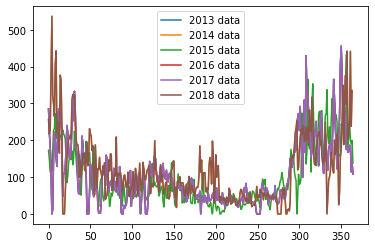

In [12]:
plt.plot(range(0,365), list2013, label='2013 data')
plt.plot(range(0,364), list2014, label='2014 data')
plt.plot(range(0,365), list2015, label='2015 data')
plt.plot(range(0,365), list2016, label='2016 data')
plt.plot(range(0,365), list2017, label='2017 data')
plt.plot(range(0,364), list2018, label='2018 data')
plt.legend()
plt.show

In [37]:
from bs4 import BeautifulSoup
import csv

In [34]:
def met_data(month, year):
    
    file_html = open('Data/Html_Data/{}/{}.html'.format(year,month), 'rb')
    plain_text = file_html.read()

    tempD = []
    finalD = []

    soup = BeautifulSoup(plain_text, "lxml")
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)

    rows = len(tempD) / 15

    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)

    length = len(finalD)

    finalD.pop(length - 1)
    finalD.pop(0)

    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)

    return finalD 

In [35]:
def data_combine(year, cs):
    for a in pd.read_csv('Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist

In [39]:
if not os.path.exists("Data/Real-Data"):
    os.makedirs("Data/Real-Data")
for year in range(2013, 2017):
    final_data = []
    with open('Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
    for month in range(1, 13):
        temp = met_data(month, year)
        final_data = final_data + temp
        
    pm = getattr(sys.modules[__name__], 'avg{}'.format(year))()
    if len(pm) == 364:
        pm.insert(364, '-')
    for i in range(len(final_data)-1):
        # final[i].insert(0, i + 1)
        final_data[i].insert(8, pm[i])
    with open('Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        for row in final_data:
            flag = 0
            for elem in row:
                if elem == "" or elem == "-":
                    flag = 1
            if flag != 1:
                wr.writerow(row)
                
data_2013 = data_combine(2013, 600)
data_2014 = data_combine(2014, 600)
data_2015 = data_combine(2015, 600)
data_2016 = data_combine(2016, 600)
 
total=data_2013+data_2014+data_2015+data_2016

with open('Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
    wr = csv.writer(csvfile, dialect='excel')
    wr.writerow(
        ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
    wr.writerows(total)

In [ ]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')